In [25]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "06").all()

[(78.0,),
 (76.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (82.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (73.0,),
 (70.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (73.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),


In [5]:
#  3. Convert the June temperatures to a list.
june_temps = session.query(Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "06").all()

In [14]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps)
june_temps_df.columns = ["June Temps"]
june_temps_df.head()

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [15]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_stats = june_temps_df.describe()
print(june_temps_stats)

        June Temps
count  1700.000000
mean     74.944118
std       3.257417
min      64.000000
25%      73.000000
50%      75.000000
75%      77.000000
max      85.000000


## D2: Determine the Summary Statistics for December

In [16]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "12").all()

[(76.0,),
 (74.0,),
 (74.0,),
 (64.0,),
 (64.0,),
 (67.0,),
 (77.0,),
 (66.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (74.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (75.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (73.0,),
 (73.0,),
 (77.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (70.0,),
 (73.0,),
 (69.0,),
 (74.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (70.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (63.0,),
 (65.0,),
 (71.0,),
 (76.0,),
 (70.0,),
 (76.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (74.0,),
 (76.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (64.0,),
 (66.0,),
 (73.0,),
 (72.0,),
 (65.0,),
 (64.0,),
 (69.0,),
 (68.0,),
 (77.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (70.0,),
 (72.0,),
 (76.0,),
 (75.0,),
 (69.0,),
 (71.0,),
 (71.0,),


In [17]:
# 7. Convert the December temperatures to a list.
dec_temps = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "12").all()

In [18]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps)
dec_temps_df.columns = ["Dec Temps"]
dec_temps_df.head()

,Dec Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [19]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_stats = dec_temps_df.describe()
print(dec_temps_stats)

         Dec Temps
count  1517.000000
mean     71.041529
std       3.745920
min      56.000000
25%      69.000000
50%      71.000000
75%      74.000000
max      83.000000


## Code for Summary

In [31]:
# Merge the stats into one table
combined_temps_stats = june_temps_stats.join(dec_temps_stats, how = "inner")
combined_temps_stats


,June Temps,Dec Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


<AxesSubplot:>

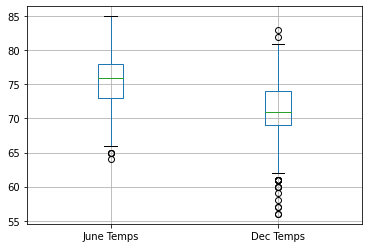

In [39]:
# Merge June and Dec temps into one dataframe
combined_temps = june_temps_df.join(dec_temps_df, how = "inner")

# Make boxplot of temps
combined_temps.boxplot()

In [ ]:
# 